### **Linear Regression**

In [ ]:
  from IPython.display import display, Math, Latex

  import seaborn as sns
  import matplotlib.pyplot as plt
  import numpy as np

  %matplotlib inline

###Training Data

In [ ]:

def add_dummy_feature(x):
  '''
  Args:
    x: Training dataset

  Returns:
    Training dataset with an addition of dummy feature.

  '''

  return np.column_stack((np.ones(x.shape[0]), x))


#used to construct the data set.
def preprocessing(n=100):
  w1 = 3
  w0 = 4


  x = 10 * np.random.randn(n, )

  #used to obtain y = data point + nosie
  y = w0 + w1 * x + np.random.randn(n, )

  print('Shape of training data feature matrix:', x.shape)
  print('Shape of label vector', y.shape)

  from sklearn.model_selection import train_test_split

  x_train, x_test, y_train, y_test = train_test_split(
                  x, y, test_size=0.20, random_state=40
                  ) 

  
  

  print()
  print('shape of training feature matrix: ', x_train.shape)
  print('shape of label vector: ', y_train.shape)

  print('shape of test feature matrix: ', x_test.shape)
  print('shape of test label vector: ', y_test.shape)


  sns.set_style('white')
  f = plt.figure(figsize= (8, 8))

  plt.plot(x_train, y_train, 'b.')
  plt.title('Data Points')
  plt.grid(True)
  plt.xlabel('$x_1$', fontsize = 18)
  plt.ylabel('$y$', fontsize = 18)


  plt.show()

  x_test = add_dummy_feature(x_test)
  x_train = add_dummy_feature(x_train)
  return x_train, x_test, y_train, y_test

In [ ]:
class LinReg(object):
  """
  y = X@w
  X: A feature matrix
  w : weight vector
  y: label vector

  """
  def __init__(self):
    self.t0 = 20
    self.t1 = 100000

  def predict(self,X:np.ndarray):
    y = X @ self.w
    return y
  
  def loss(self, X:np.ndarray, y:np.ndarray):
    e =  self.predict(X)-y
    return ((1/2)*(np.transpose(e) @ e))

  def rmse (self, X:np.ndarray, y:np.ndarray):
    return np.sqrt((2/X.shape[0]) * self.loss(X,y)) #2/n * loss
  
  def fit (self, X:np.ndarray, y:np.ndarray):
    self.w = np.linalg.pinv(X) @ y
    return self.w
  
  def calculate_gradient(self, X:np.ndarray, y:np.ndarray):
    return(np.transpose(X) @ (self.predict(X)-y))
  
  def update_weights(self, grad:np.ndarray, lr:float):
    return(self.w - lr*grad)

  def learning_schedule(self,t):
    return self.t0 / (t+self.t1)

  def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float):
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
    for i in np.arange(0,num_epochs):
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y))
      djdw = self.calculate_gradient(X,y)
      self.w = self.update_weights(djdw,lr)
    return self.w

  def mbgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, batch_size:int):
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
    mini_batch_id = 0

    for epoch in range(num_epochs):
      shuffled_indices = np.random.permutation(X.shape[0])
      X_shuffled = X[shuffled_indices]
      y_shuffled = y[shuffled_indices]
      for i in range(0,X.shape[0],batch_size):
        mini_batch_id += 1
        xi = X_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))
        djdw = 2/batch_size * self.calculate_gradient(xi,yi)
        self.w = self.update_weights(djdw,self.learning_schedule(mini_batch_id))
    return self.w

  def sgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int):
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
 
    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
       
        random_index = np.random.randint(X.shape[0])
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))
        djdw = 2 * self.calculate_gradient(xi,yi)
        self.w = self.update_weights(djdw,self.learning_schedule(epoch * X.shape[0] + i))
    return self.w

In [ ]:
lin_reg = LinReg()
lin_reg.fit(X_train,y_train)
lin_reg.w

In [ ]:
lin_reg = LinReg()
lin_reg.gd(X_train,y_train,1000,0.0001)
lin_reg.w

In [ ]:
lin_reg = LinReg()
lin_reg.mbgd(X_train,y_train,2000,16)
lin_reg.w

In [ ]:
lin_reg = LinReg()
lin_reg.sgd(X_train,y_train,1000)
lin_reg.w

In [ ]:
import unittest
class TestAddDummyFeature(unittest.TestCase):

  def test_add_dummy_feature(self):
    '''Test case function to test add_test_dummy_feature'''
    train_matrix = np.array([[1, 2, 3], [4, 5, 6]])
    train_matrix_with_dummy_feature = add_dummy_feature(train_matrix)

    #Testing shape
    self.assertEqual(train_matrix_with_dummy_feature.shape,(2, 4) )

    #Testing the contents
    np.testing.assert_array_equal(train_matrix_with_dummy_feature, 
                                    np.array([[1,1,2,3], [1, 4, 5, 6]]))
    
unittest.main(argv=[''], defaultTest='TestAddDummyFeature', verbosity = 2, exit = False)


test_add_dummy_feature (__main__.TestAddDummyFeature)
Test case function to test add_test_dummy_feature ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


###Model

In [ ]:
import unittest

class TestPredict(unittest.TestCase):

  def test_predict(self):
    '''Test case predict function for linear regression'''

    train_matrix = np.array([[1, 3, 2, 5], [1, 9, 4, 7]])
    weight_vector = np.array([1, 1, 1, 1])
    expected_label_vector = np.array([11, 21])

    predicted_label_vector = predict(train_matrix, weight_vector)

    #Checking shape
    self.assertEqual(predicted_label_vector.shape, (2, ))

    #Testing content
    np.testing.assert_array_equal(predicted_label_vector, expected_label_vector)

unittest.main(argv=[''], verbosity=2, defaultTest='TestPredict', exit=False)

test_predict (__main__.TestPredict)
Test case predict function for linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


##Loss implementation

###Synthetic Data

Shape of training data feature matrix: (100,)
Shape of label vector (100,)

shape of training feature matrix:  (80,)
shape of label vector:  (80,)
shape of test feature matrix:  (20,)
shape of test label vector:  (20,)


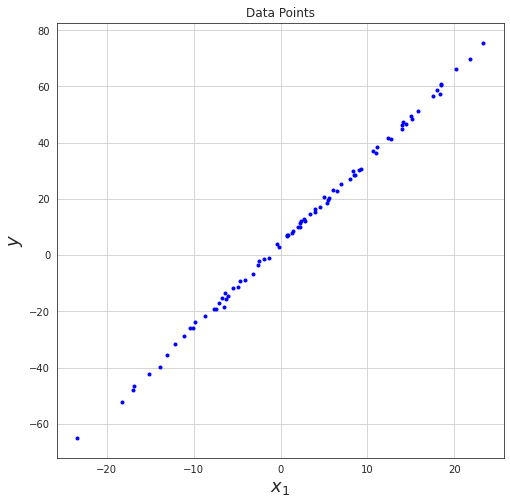

In [ ]:
x_train, x_test, y_train, y_test = preprocessing(100)

###Gradient Descent

Weight Update

In [ ]:
def weightUpdate(w, grad, lr):
  '''Updates the weight vector based on gradient of loss function

    Formula used to update the weight vector
    w_new = w_old - lr * gradient 


    args
    w: Weight vector.
    grad: Gradient vector
    lr: Learning rate

    Returns
    Updatd weight vector
  '''
  return (w - lr*grad)

In [ ]:
def gradient_descent(x: np.ndarray, y: np.ndarray, lr:float, epochs: int):
  '''Estimates parameters of gradient descent through linear regression

    Args
    x: Feature matrix
    y: Label vector
    lr: Learning rate
    epochs: No of epochs


    Returns 
    wieght vector: Final weight vector
    Error vector across different iterations
    weight vectors across different iterations

  '''

  #Weight vector to store all wights thought different iterations
  w_all = []

  #Loss vector to store loss during different iterations
  error_all = []

  #initital weight vecotr 
  w = np.zeros((x.shape[1]))

  print()

  for i in range(1, epochs+1):
    w_all.append(w)

    error_all.append(loss(x, y, w))

    #Gradient Calculation
    grad_vector = calculate_grad(x, y, w)

    if i%100 == 0:
      print('Iteration #{}, loss: {:.6f}'.format(i, error_all[-1]))

    w = weightUpdate(w, grad_vector, lr)

  return w, error_all, w_all

Pltong Learning Curve


Iteration #100, loss: 164.624803
Iteration #200, loss: 62.378606
Iteration #300, loss: 40.356023
Iteration #400, loss: 35.612628
Iteration #500, loss: 34.590959
Iteration #600, loss: 34.370903
Iteration #700, loss: 34.323506
Iteration #800, loss: 34.313297
Iteration #900, loss: 34.311099
Iteration #1000, loss: 34.310625
Iteration #1100, loss: 34.310523
Iteration #1200, loss: 34.310501
Iteration #1300, loss: 34.310496
Iteration #1400, loss: 34.310495
Iteration #1500, loss: 34.310495


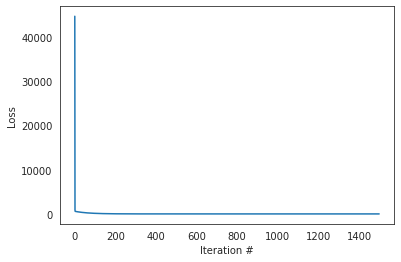

[4.00744988 3.01645002]


In [ ]:
def plot_learning(error_all):
  plt.plot(error_all)
  plt.xlabel('Iteration #')
  plt.ylabel('Loss')
  plt.show()

w, error_all, w_all = gradient_descent(x_train, y_train, 0.0001, 1500)
plot_learning(error_all)
print(w)

In [ ]:
import numpy as np

In [ ]:
a = np.arange(1, 5).reshape(-1, 2)
a

array([[1, 2],
       [3, 4]])

In [ ]:
b = np.arange(5, 9).reshape(2, -1)
b

array([[5, 6],
       [7, 8]])